<a href="https://colab.research.google.com/github/lenaphamthi/TestInter_FarmerData_Pham-Thi-Le-Na/blob/main/FarmerData_Inter_Pham_Thi_Le_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kết nối với Drive và Khai báo những thư viện cần thiết

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!gdown 11oq-oW9IybTYo8KDcXRjM9xltnUzgJuW

Downloading...
From: https://drive.google.com/uc?id=11oq-oW9IybTYo8KDcXRjM9xltnUzgJuW
To: /content/farmer_data_1.csv
100% 197k/197k [00:00<00:00, 71.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [ ]:
df = pd.read_csv('/content/farmer_data_1.csv')
df.head()

,farmer,yearly_average_temperature,yearly_min_temperature,yearly_max_temperature,crop_yield
0,A,13.668696,7.976930,20.448653,89.509033
1,A,25.593820,19.930093,35.064906,104.204879
2,A,21.937003,12.089319,27.580745,99.456915
3,A,18.916655,10.343680,25.567153,94.847486
4,A,11.999498,6.794161,18.607412,78.806487


#Tiến hành Thống kê mô tả

In [ ]:
#Khai báo dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   farmer                      2585 non-null   object 
 1   yearly_average_temperature  2585 non-null   float64
 2   yearly_min_temperature      2585 non-null   float64
 3   yearly_max_temperature      2585 non-null   float64
 4   crop_yield                  2585 non-null   float64
dtypes: float64(4), object(1)
memory usage: 101.1+ KB


In [ ]:
#Thể hiện tổng số lượng xuất hiện của các farmer A, B, C
dt = df['farmer'].value_counts()
print(dt)

farmer
C    1348
B     935
A     302
Name: count, dtype: int64


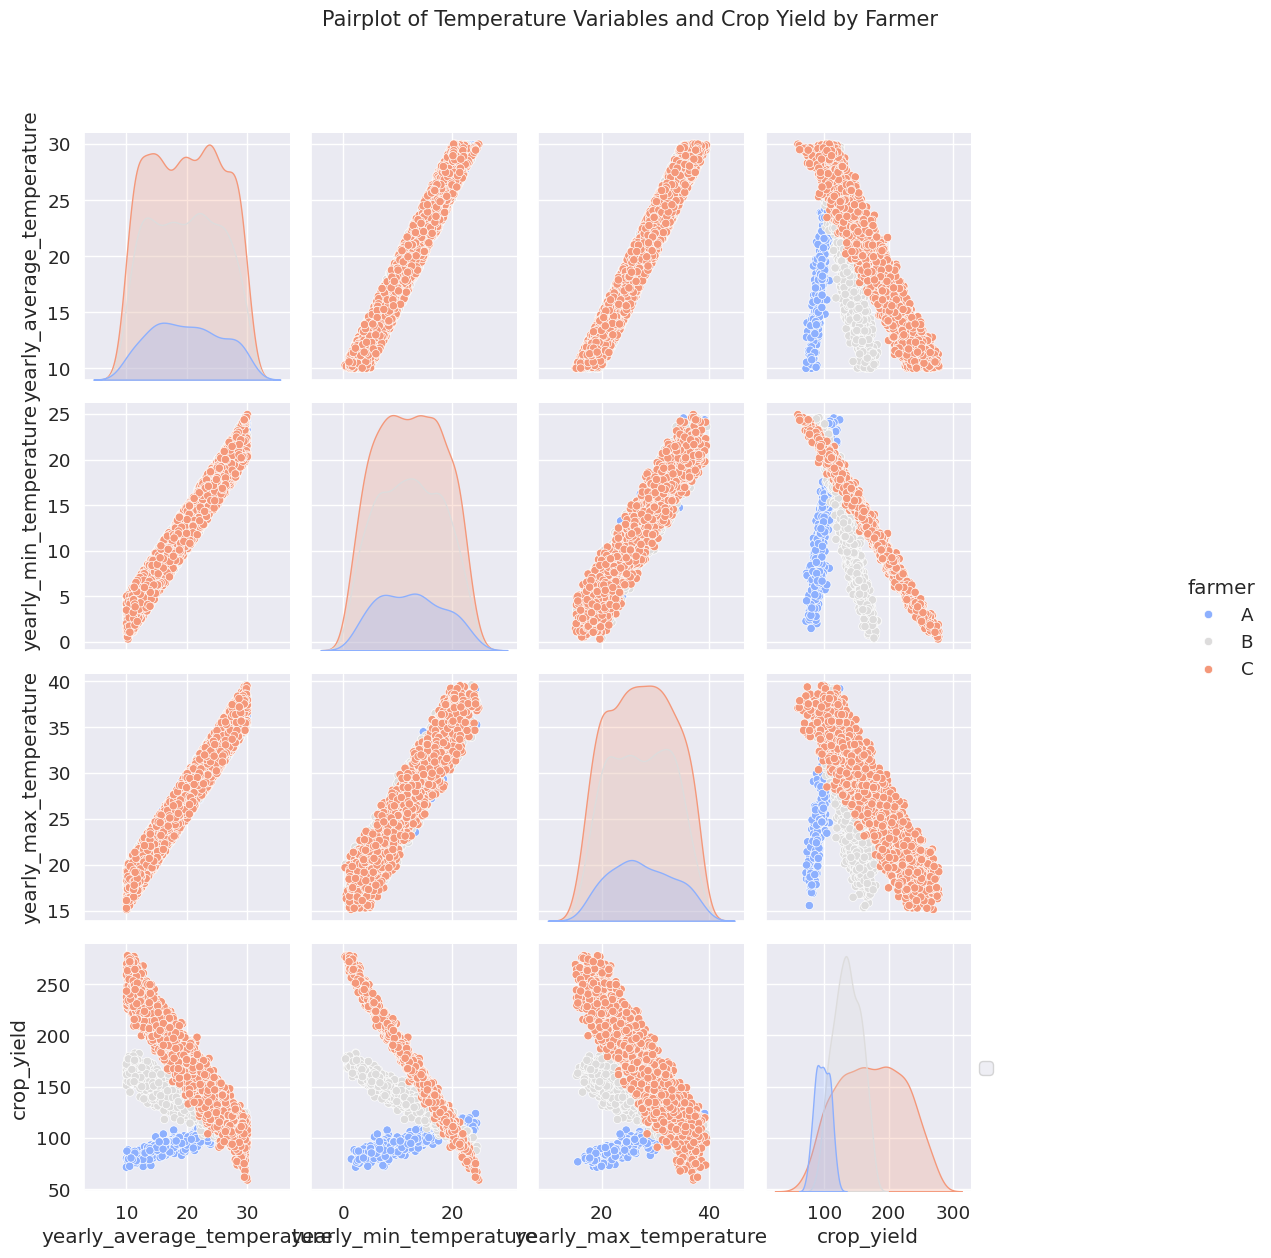

In [34]:
# Tạo biểu đồ pairplot
bp = sns.pairplot(df, vars=['yearly_average_temperature', 'yearly_min_temperature', 'yearly_max_temperature', 'crop_yield'], hue='farmer', palette='coolwarm', height=3.0)
bp.fig.suptitle('Pairplot of Temperature Variables and Crop Yield by Farmer', y=1.05, fontsize=15)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=35, fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), rotation=35, fontsize=8)
    ax.yaxis.get_label().set_rotation(80)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout(rect=[0, 0, 0.80, 1])
plt.show()

<Figure size 1000x500 with 0 Axes>

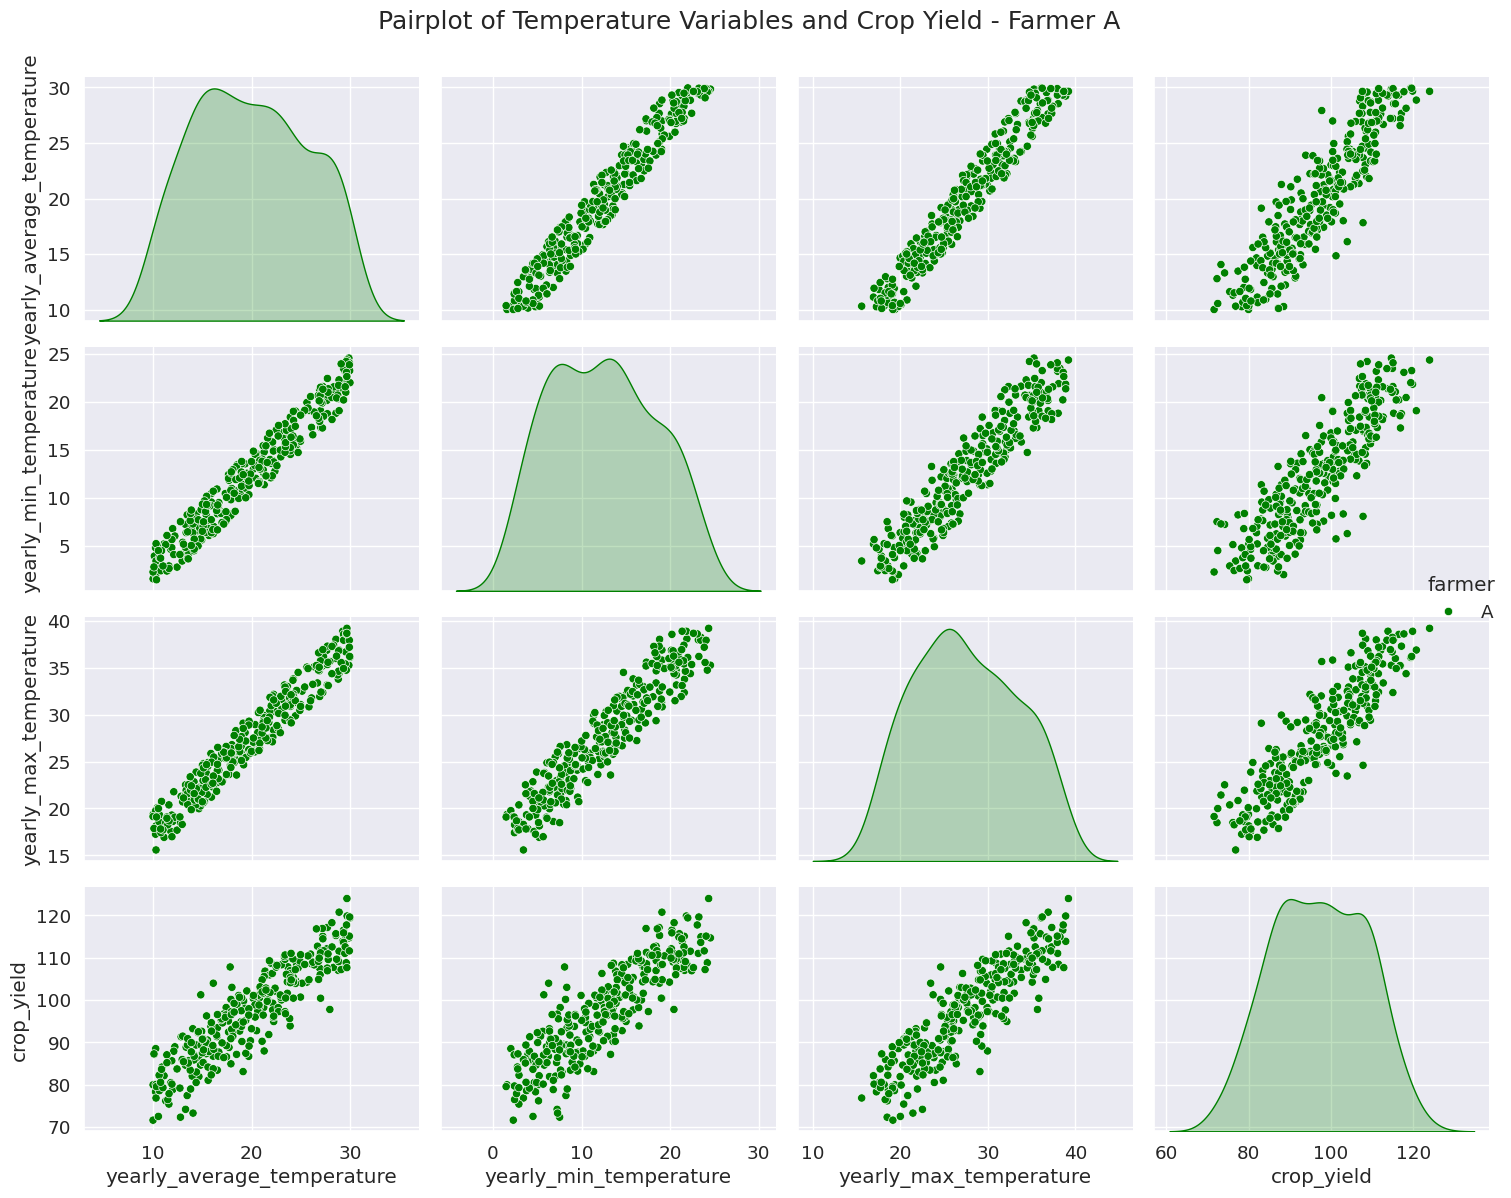

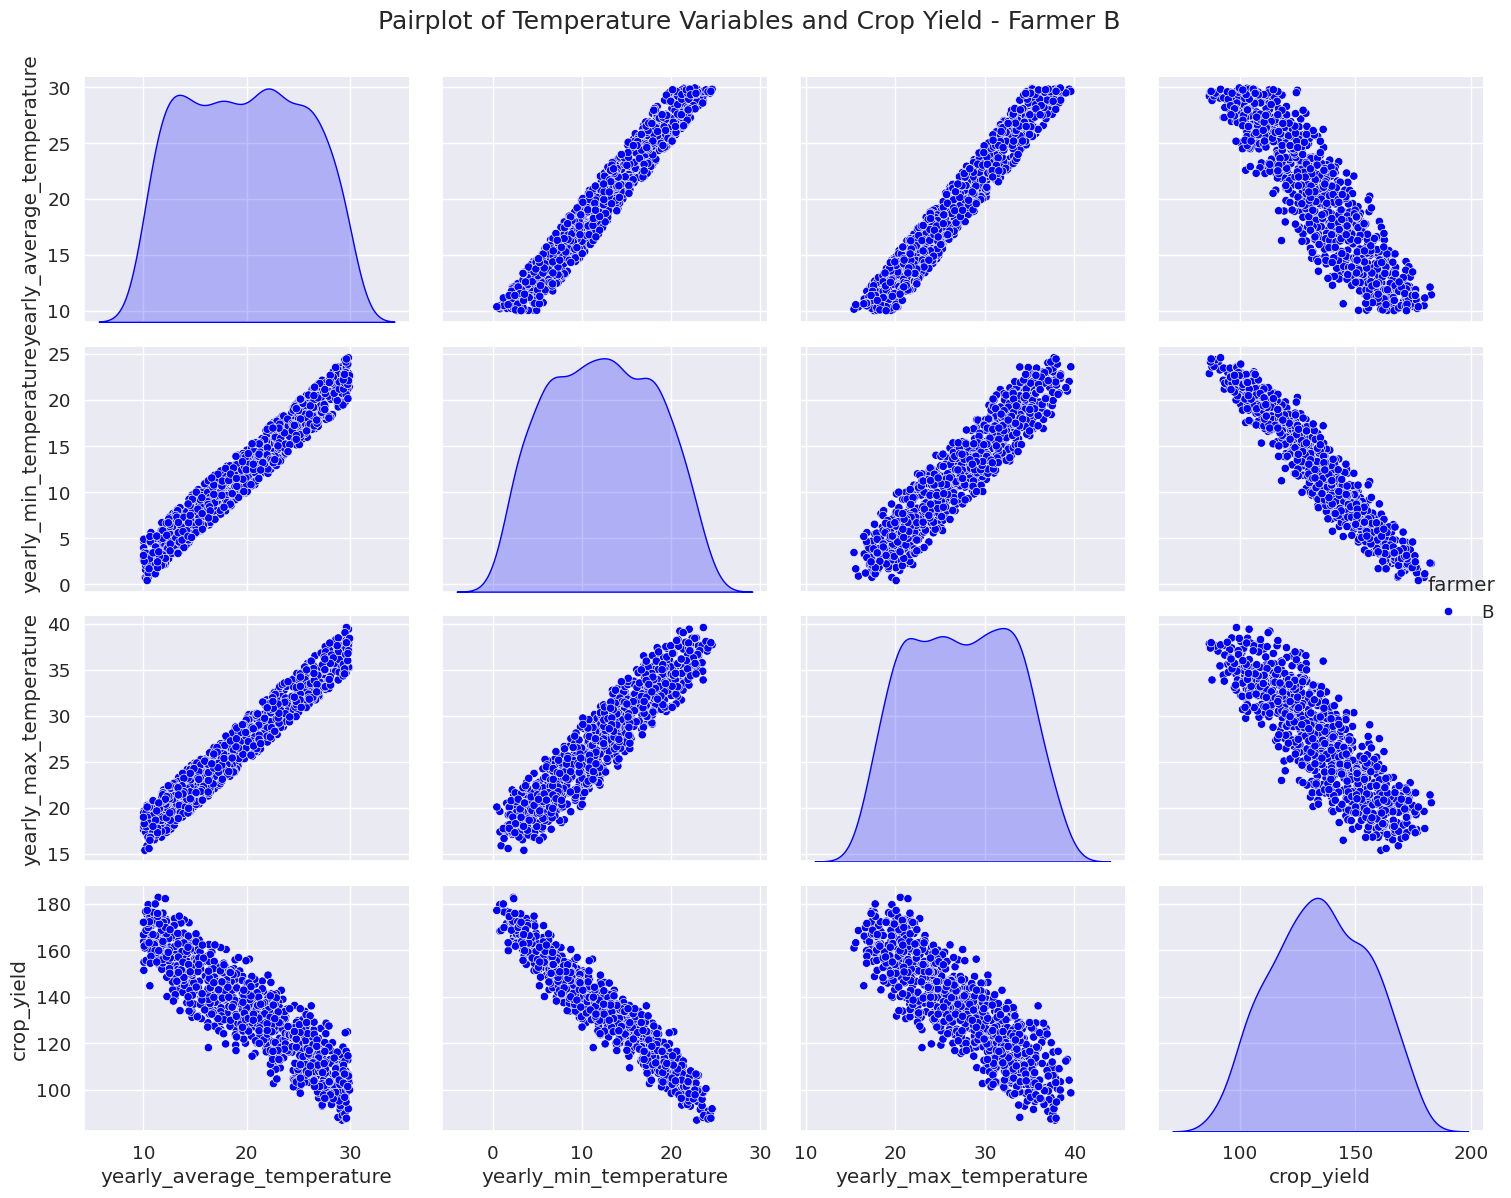

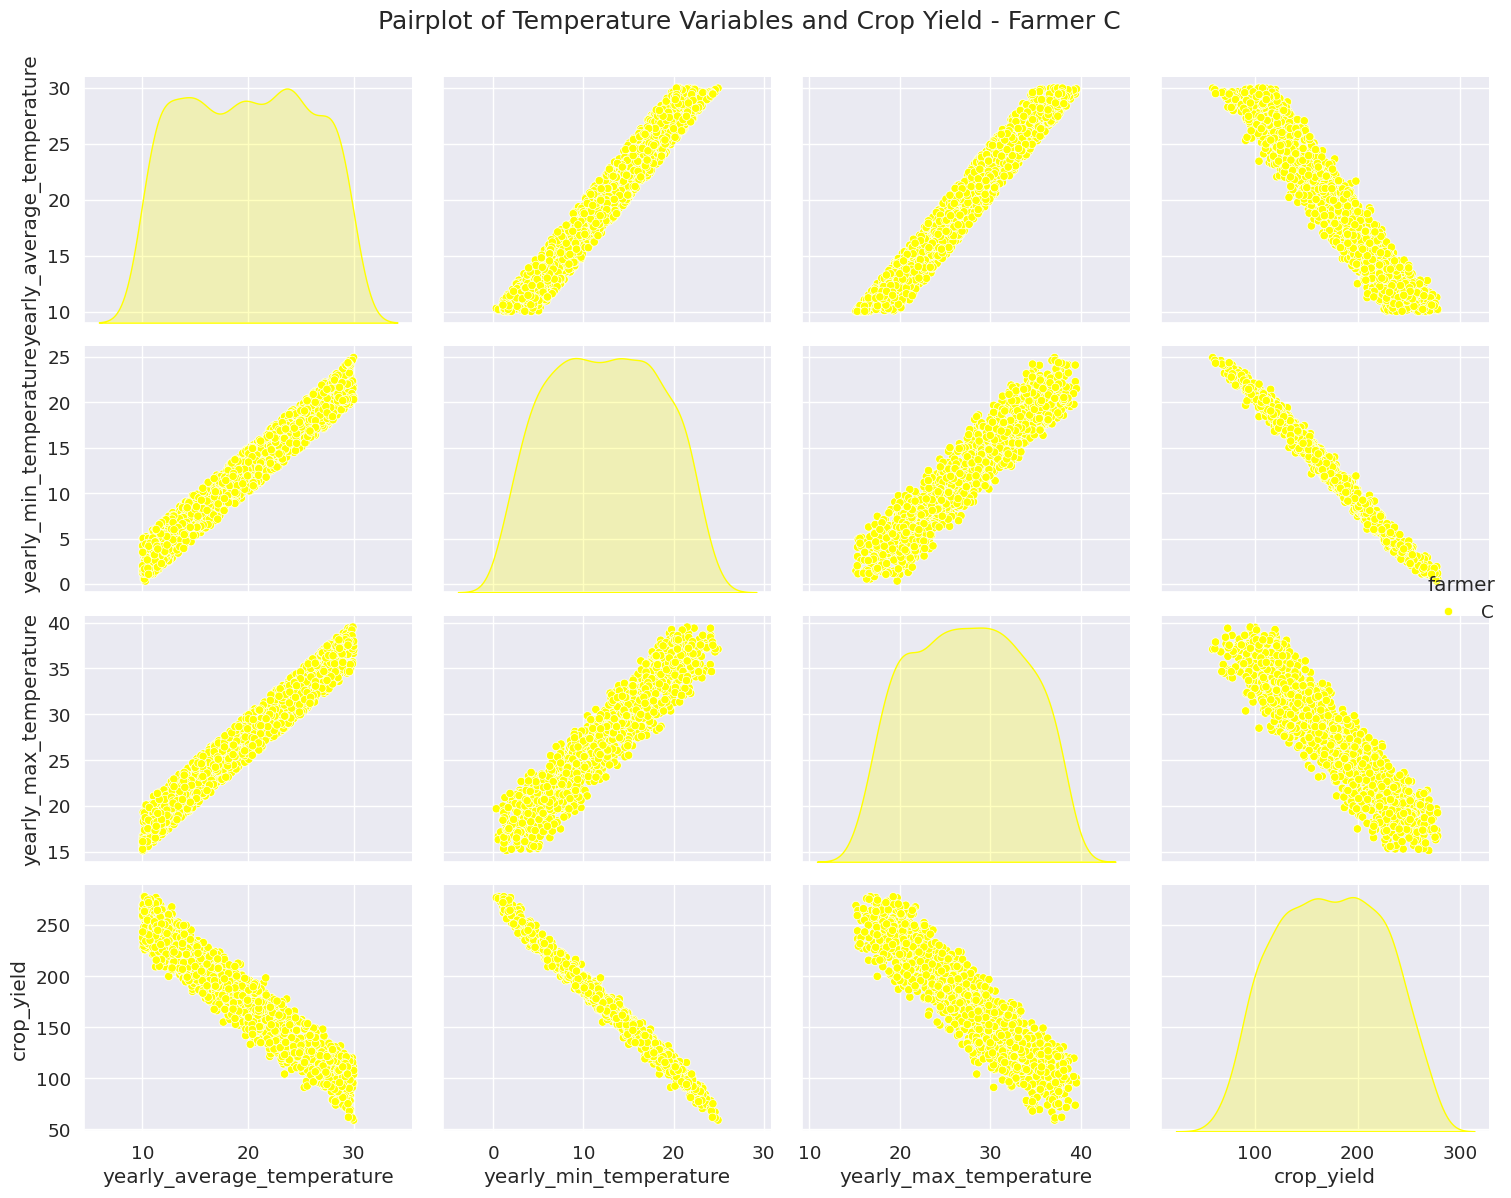

In [27]:
#Tiến hành vẽ Vẽ boxplot cho 3 farmer A,B,C lần lượt như sau
color_map = {'A': 'green', 'B': 'blue', 'C': 'yellow'}
df_bx['color'] = df_bx['farmer'].map(color_map)
plt.figure(figsize=(10, 5))
for farmer in ['A', 'B', 'C']:
    farmer_data = df_copy[df_copy['farmer'] == farmer]
    bp = sns.pairplot(farmer_data, vars=['yearly_average_temperature', 'yearly_min_temperature', 'yearly_max_temperature', 'crop_yield'],
                     height=4, aspect=1.5, markers='o', hue='farmer', palette={farmer: color_map[farmer]})
    bp.fig.suptitle(f'Pairplot of Temperature Variables and Crop Yield - Farmer {farmer}', y=1, fontsize=18)
    plt.tight_layout()
plt.show()

In [ ]:
#Ta tiến hành chia tập train - test cho dữ liệu lần lụowt cho farmer A,B,C
#farmer A
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.25, random_state=42)
print(f"Farmer A - Train X shape: {X_train_A.shape}, Train y shape: {y_train_A.shape}")
print(f"Farmer A - Test X shape: {X_test_A.shape}, Test y shape: {y_test_A.shape}")
#farmer B
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.25, random_state=42)
print(f"Farmer B - Train X shape: {X_train_B.shape}, Train y shape: {y_train_B.shape}")
print(f"Farmer B - Test X shape: {X_test_B.shape}, Test y shape: {y_test_B.shape}")
#farmer C
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, test_size=0.25, random_state=42)
print(f"Farmer C - Train X shape: {X_train_C.shape}, Train y shape: {y_train_C.shape}")
print(f"Farmer C - Test X shape: {X_test_C.shape}, Test y shape: {y_test_C.shape}")

Farmer A - Train X shape: (226, 3), Train y shape: (226,)
Farmer A - Test X shape: (76, 3), Test y shape: (76,)
Farmer B - Train X shape: (701, 3), Train y shape: (701,)
Farmer B - Test X shape: (234, 3), Test y shape: (234,)
Farmer C - Train X shape: (1011, 3), Train y shape: (1011,)
Farmer C - Test X shape: (337, 3), Test y shape: (337,)


In [36]:
#Tiếp đến huấn luyện mô hình cho tập dữ liệu và đồng thời lưu mô hình trên google drive
#Farmer A
model_fmA =Ridge()
model_fmA.fit(X_A, y_A)
path_A = '/content/drive/MyDrive/Inter/Farmer_a.pkl'
joblib.dump(model_fmA, path_A)

#Farmer B
model_fmB = Ridge()
model_fmB.fit(X_B, y_B)
path_B = '/content/drive/MyDrive/Inter/Farmer_b.pkl'
joblib.dump(model_fmB,path_B)

#Farmer C
model_fmC = Ridge()
model_fmC.fit(X_C, y_C)
path_C = '/content/drive/MyDrive/Inter/Farmer_c.pkl'
joblib.dump(model_fmC, path_C)

['/content/drive/MyDrive/Inter/Farmer_c.pkl']

In [37]:
!pip install requests aiohttp

In [44]:
import requests

def kelvin_to_celsius(k):
    return k - 273.15

def get_yearly_temperature(latitude, longitude):
    api_key = 'feaae6bbcd97d5ef6eda33f051988308'
    url = f'https://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={api_key}'
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            forecast_list = data['list'][:10]
            # Initialize variables to store temperature sums and counts
            total_temp = 0
            total_min_temp = float('inf')
            total_max_temp = float('-inf')
            total_days = len(forecast_list)

            for forecast in forecast_list:
                temp = kelvin_to_celsius(forecast['main']['temp'])
                min_temp = kelvin_to_celsius(forecast['main']['temp_min'])
                max_temp = kelvin_to_celsius(forecast['main']['temp_max'])

                total_temp += temp
                if min_temp < total_min_temp:
                    total_min_temp = min_temp
                if max_temp > total_max_temp:
                    total_max_temp = max_temp

            average_temp = total_temp / total_days
            return {
                'average_temperature': average_temp,
                'min_temperature': total_min_temp,
                'max_temperature': total_max_temp
            }
        else:
            print(f"Không thể truy xuất dữ liệu. Mã trạng thái: {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Lỗi trong quá trình yêu cầu: {e}")
        return None

def assign_region(latitude, longitude):
    if longitude >= -180 and longitude < 0 and latitude >= -90 and latitude < 0:
        return 'Farmer_A'
    elif longitude >= -180 and longitude < 0 and latitude >= 0 and latitude <= 90:
        return 'Farmer_B'
    elif longitude >= 0 and longitude <= 180 and latitude >= -90 and latitude <= 90:
        return 'Farmer_C'
    else:
        return 'Unknown'
#Người nông dân nhập kinh độ và vĩ độ
kd = float(input('Vui lòng nhập kinh độ : '))
vd = float(input('Vui lòng nhập vĩ độ : '))
fm = assign_region(kd, vd)
temperature_data = get_yearly_temperature(kd, vd)
if temperature_data is not None:
    print(f"Nhiệt độ trung bình trong năm tại ({kd}, {vd}): {temperature_data['average_temperature']:.2f} độ C")
    print(f"Nhiệt độ tối thiểu trong năm tại ({kd}, {vd}): {temperature_data['min_temperature']:.2f} độ C")
    print(f"Nhiệt độ tối đa trong năm tại ({kd}, {vd}): {temperature_data['max_temperature']:.2f} độ C")
    print(f"Cánh đồng thuộc khu vực: {fm}")

Vui lòng nhập kinh độ : 90
Vui lòng nhập vĩ độ : 180
Nhiệt độ trung bình trong năm tại (90.0, 180.0): 0.28 độ C
Nhiệt độ tối thiểu trong năm tại (90.0, 180.0): 0.04 độ C
Nhiệt độ tối đa trong năm tại (90.0, 180.0): 0.56 độ C
Cánh đồng thuộc khu vực: Farmer_C
